In [2]:
from hough_circle import hough_circle
from detect_extremes import detect_extreme_points, to_bit_array

import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from scipy.signal import convolve2d

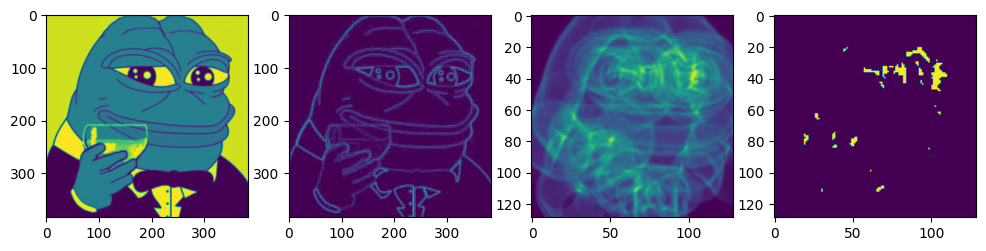

circles detected at: [22.5  45.25] [35.1875 92.5625] [36.5        62.07142857] [43.5        93.83333333] [44.83333333 68.66666667] [ 58.5 102.5] [ 62.83333333 105.16666667] [65.   27.25] [77.5 38. ] [79.19230769 20.26923077] [80.88888889 50.66666667] [84.1 38.7] [85.5 98.5] [99.5 61.5] [110.95454545  67.40909091] [112.   30.5]


In [10]:
# shape detection params
normalize = False
threshold = 6
max_cluster_size = 10
leap_size = 2
shrink_factor = 3

img = np.array(Image.open("frog.png").convert("L"))
# edge detection - optional
edge_kernel = np.array([[-2, -3,  -2],
                        [-3,  20, -3],
                        [-2, -3,  -2]]) / 20
edges = np.abs(convolve2d(img, edge_kernel, mode='same', boundary='symm'))

hough = hough_circle(edges, 40, shrink_factor=shrink_factor)
bits  = to_bit_array(hough, threshold=threshold, normalize=normalize)

images_to_display = [img, edges, hough, bits]
fig = plt.figure(figsize=(12, 40))

for i, img in enumerate(images_to_display):
    fig.add_subplot(1, len(images_to_display), i+1)
    plt.imshow(img)
plt.show()

print("circles detected at:", *detect_extreme_points(hough, 
                                                     threshold=threshold, 
                                                     max_cluster_size=max_cluster_size, 
                                                     leap_size=leap_size, 
                                                     normalize=normalize))

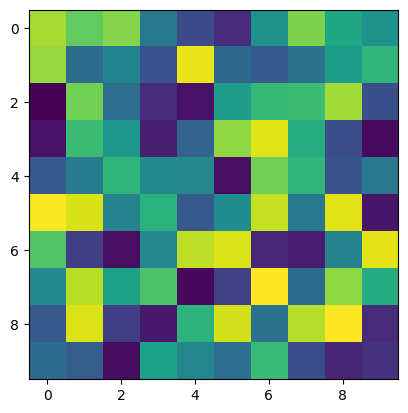

In [3]:

array = np.random.rand(10, 10)*2
plt.imshow(array)


In [4]:
detect_extreme_points(array)

[array([0., 2.]), array([0., 7.]), array([1., 4.]), array([2., 8.])]